In [48]:
# Aufgabe 1.a

import numpy as np

D = np.loadtxt('data.txt')

print('Anzahl Datenpunkte:', D.shape[0], '\nAnzahl Dimensionen:', D.shape[1])

Anzahl Datenpunkte: 10000 
Anzahl Dimensionen: 6


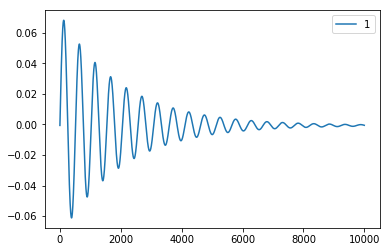

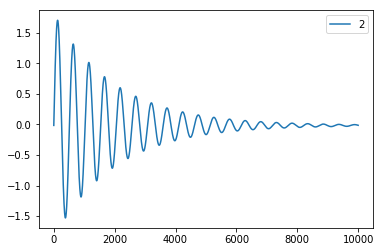

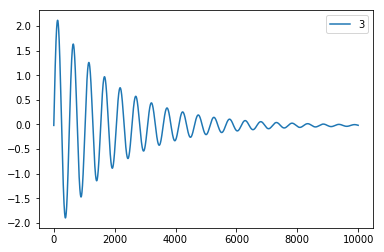

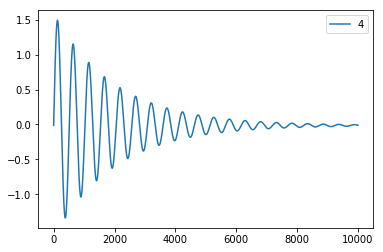

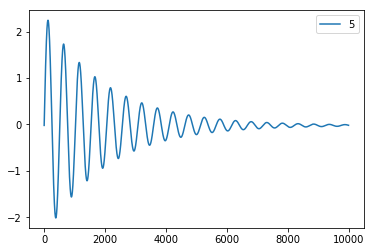

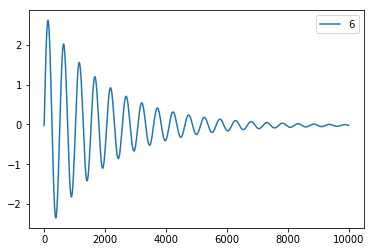

In [45]:
import matplotlib.pyplot as plt

for dim in range(data.shape[1]):
    plt.plot(D[:, dim], label = dim + 1)
    plt.legend()
    plt.show()

In [51]:
# Aufgabe 1.b

for i in range(D.shape[1]):
    D[:, i] -= D[:, i].sum() / len(D)

D_transposed = D.transpose()

In [54]:
# Aufgabe 1.c

K = np.zeros([len(D_transposed), len(D_transposed)])

for i in range(len(K)):
    for j in range(len(K)):
        cov = 0
        for n in range(D_transposed.shape[1]):
            cov += D_transposed[i, n] * D_transposed[j, n]
        K[i, j] = cov / D_transposed.shape[1]
        
print(K)

[[  2.68460397e-04   6.71128411e-03   8.33259988e-03   5.88013213e-03
    8.83208816e-03   1.03044568e-02]
 [  6.71128411e-03   1.67776457e-01   2.08307988e-01   1.46998357e-01
    2.20794775e-01   2.57602752e-01]
 [  8.33259988e-03   2.08307988e-01   2.58631148e-01   1.82510303e-01
    2.74134500e-01   3.19834569e-01]
 [  5.88013213e-03   1.46998357e-01   1.82510303e-01   1.28793499e-01
    1.93450676e-01   2.25700208e-01]
 [  8.83208816e-03   2.20794775e-01   2.74134500e-01   1.93450676e-01
    2.90567182e-01   3.39006690e-01]
 [  1.03044568e-02   2.57602752e-01   3.19834569e-01   2.25700208e-01
    3.39006690e-01   3.95521390e-01]]
